# Finding the best advertisement banner using MAB

Imagine we have a website and we want to find out which advertisement banner is the most popular among our users. We have five different banners to choose from. To figure out which one is liked the most, we can use one of MAB algorithms.

In the MAB framework, each banner is like an arm of a slot machine. When a user clicks on a banner, you assign a reward of +1, and if they don't click, the reward is 0. The goal is to find the banner that gets the highest number of clicks or rewards.

In this
case study, let's just use an epsilon-greedy method to understand the best advertisement
banner.

First, let us import the necessary libraries:

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

## Uploading a dataset

Now, let's upload a dataset with five columns denoting the five
advertisement banners and 100000 rows where the values in the row is either 0 or 1 indicating whether the advertisement banner has been clicked (1) or not (0) by the user:

In [54]:
df = pd.read_excel('Ad_banners_Bid_Oscar_website_users.xlsx')

Let's look at the first few rows of our dataset:

In [55]:
df.head()

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,0,1,0,1,1
1,1,0,0,1,0
2,0,1,1,0,1
3,0,1,1,0,0
4,0,1,0,1,0


In [56]:
df.shape

(100000, 5)

We can't systemtically say that Banner type 2 is the best although it has the higher number of clicks

In [69]:
for col in df.columns:
  print(f"For a total users of {len(df)}, the number of users who clicked on the {col} is {df[col].sum()}\n")

For a total users of 100000, the number of users who clicked on the Banner_type_0 is 49851

For a total users of 100000, the number of users who clicked on the Banner_type_1 is 49982

For a total users of 100000, the number of users who clicked on the Banner_type_2 is 50062

For a total users of 100000, the number of users who clicked on the Banner_type_3 is 49761

For a total users of 100000, the number of users who clicked on the Banner_type_4 is 49986



**Note that this dataset help us to know the probability distribution of the arms(banners). Instead of having a specific value of probability for each banner, we have the observed data that we can be directly used**

## Initialize the variables

Now, let's initialize some of the important variables:

Set the number of iterations (should be equal to the number of users/rows in the dataset):

In [81]:
num_iterations = df.shape[0]

Define the number of banners (equal to the number of columns):

In [82]:
num_banner = df.shape[1]

Initialize count for storing the number of times, the banner was clicked:

In [83]:
count = np.zeros(num_banner)

Initialize sum_rewards for storing the sum of rewards obtained from each banner:

In [84]:
sum_rewards = np.zeros(num_banner)

Initialize Q for storing the mean reward of each banner:

In [85]:
Q = np.zeros(num_banner)

Define the list for storing the selected banners:

In [86]:
banner_selected = []

## Define the epsilon-greedy method

Now, let's define the epsilon-greedy method. We generate a random value from a uniform
distribution. If the random value is less than epsilon, then we select the random banner else
we select the best banner which has a maximum average reward:

In [87]:
def epsilon_greedy_policy(epsilon):

    if np.random.uniform(0,1) < epsilon:
        return  np.random.choice(num_banner)
    else:
        return np.argmax(Q)

## Run the bandit test

Now, we run the epsilon-greedy policy to understand which is the best advertisement
banner:

In [114]:
#for each iteration
for i in range(num_iterations):

    #select the banner using the epsilon-greedy policy
    banner = epsilon_greedy_policy(0.5)

    #get the reward of the banner
    reward = df.values[i, banner]

    #increment the counter
    count[banner] += 1

    #store the sum of rewards
    sum_rewards[banner]+=reward

    #compute the average reward
    Q[banner] = sum_rewards[banner]/count[banner]

    #store the banner to the banner selected list
    banner_selected.append(banner)

After all the rounds, we can select the best banner as the one which has the maximum
average reward:

In [115]:
print( 'The optimal banner is banner {}'.format(np.argmax(Q)))

The optimal banner is banner 2


We can also plot and see which banner is selected most of the times:

In [110]:
investment_opportunities = ['Banner 0', 'Banner 1', 'Banner 2', 'Banner 3', 'Banner 4']

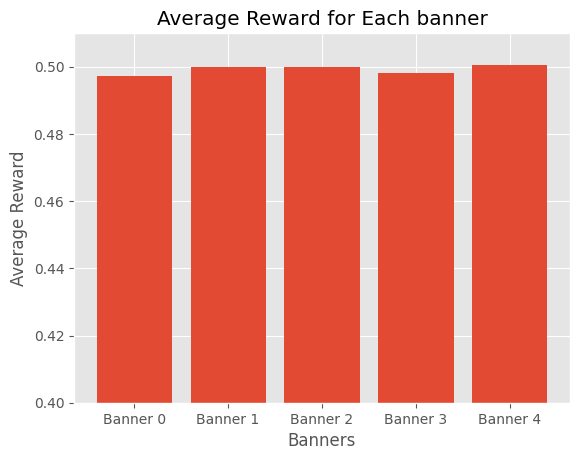

In [111]:
plt.bar(investment_opportunities, Q)
plt.ylim(0.4, 0.51)
plt.xlabel('Banners')
plt.ylabel('Average Reward')
plt.title('Average Reward for Each banner')
plt.show()

Thus, we learned how to find the best advertisement banner by framing our problem as a multi-armed bandit problem